In [8]:
import matplotlib.pyplot as plt
from rasterio import open as rast_open
from rasterio.plot import reshape_as_image
import cv2
import os

## Reading and converting the images

In [9]:
RAW_DATA_PATH = './data/raw_data'
image_paths = []
image_names = []

for dirpath, _, filenames in os.walk(RAW_DATA_PATH):
    if dirpath.endswith('IMG_DATA'):
        for filename in filenames:
            if not filename.endswith('_TCI.jp2'):
                continue
            image_paths.append(os.path.join(dirpath, filename))
            image_names.append(filename)

image_paths[0]

'./data/raw_data/S2A_MSIL1C_20160212T084052_N0201_R064_T36UYA_20160212T084510/S2A_MSIL1C_20160212T084052_N0201_R064_T36UYA_20160212T084510.SAFE/GRANULE/L1C_T36UYA_A003350_20160212T084510/IMG_DATA/T36UYA_20160212T084052_TCI.jp2'

In [10]:
image_names[0]

'T36UYA_20160212T084052_TCI.jp2'

In [11]:
def read_raster_image(path):
    '''Read .jp2 file located on the path and reshape to (C x H x W) format.'''
    with rast_open(path, "r", driver='JP2OpenJPEG') as rst_src:
        raster_image = rst_src.read()
    image = reshape_as_image(raster_image)
    return image

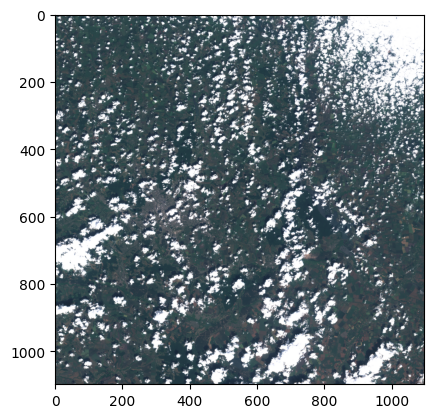

In [12]:
scaled_images = []
for i, path in enumerate(image_paths):
    image = read_raster_image(path)
    scaled_image = cv2.resize(image, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_AREA) # scale image down 10x along each axis
    scaled_images.append(scaled_image)
plt.imshow(scaled_images[25]);

**For some reason, some of the images are with black areas, even when re-downloading then from kaggle, so they will be skipped for now**

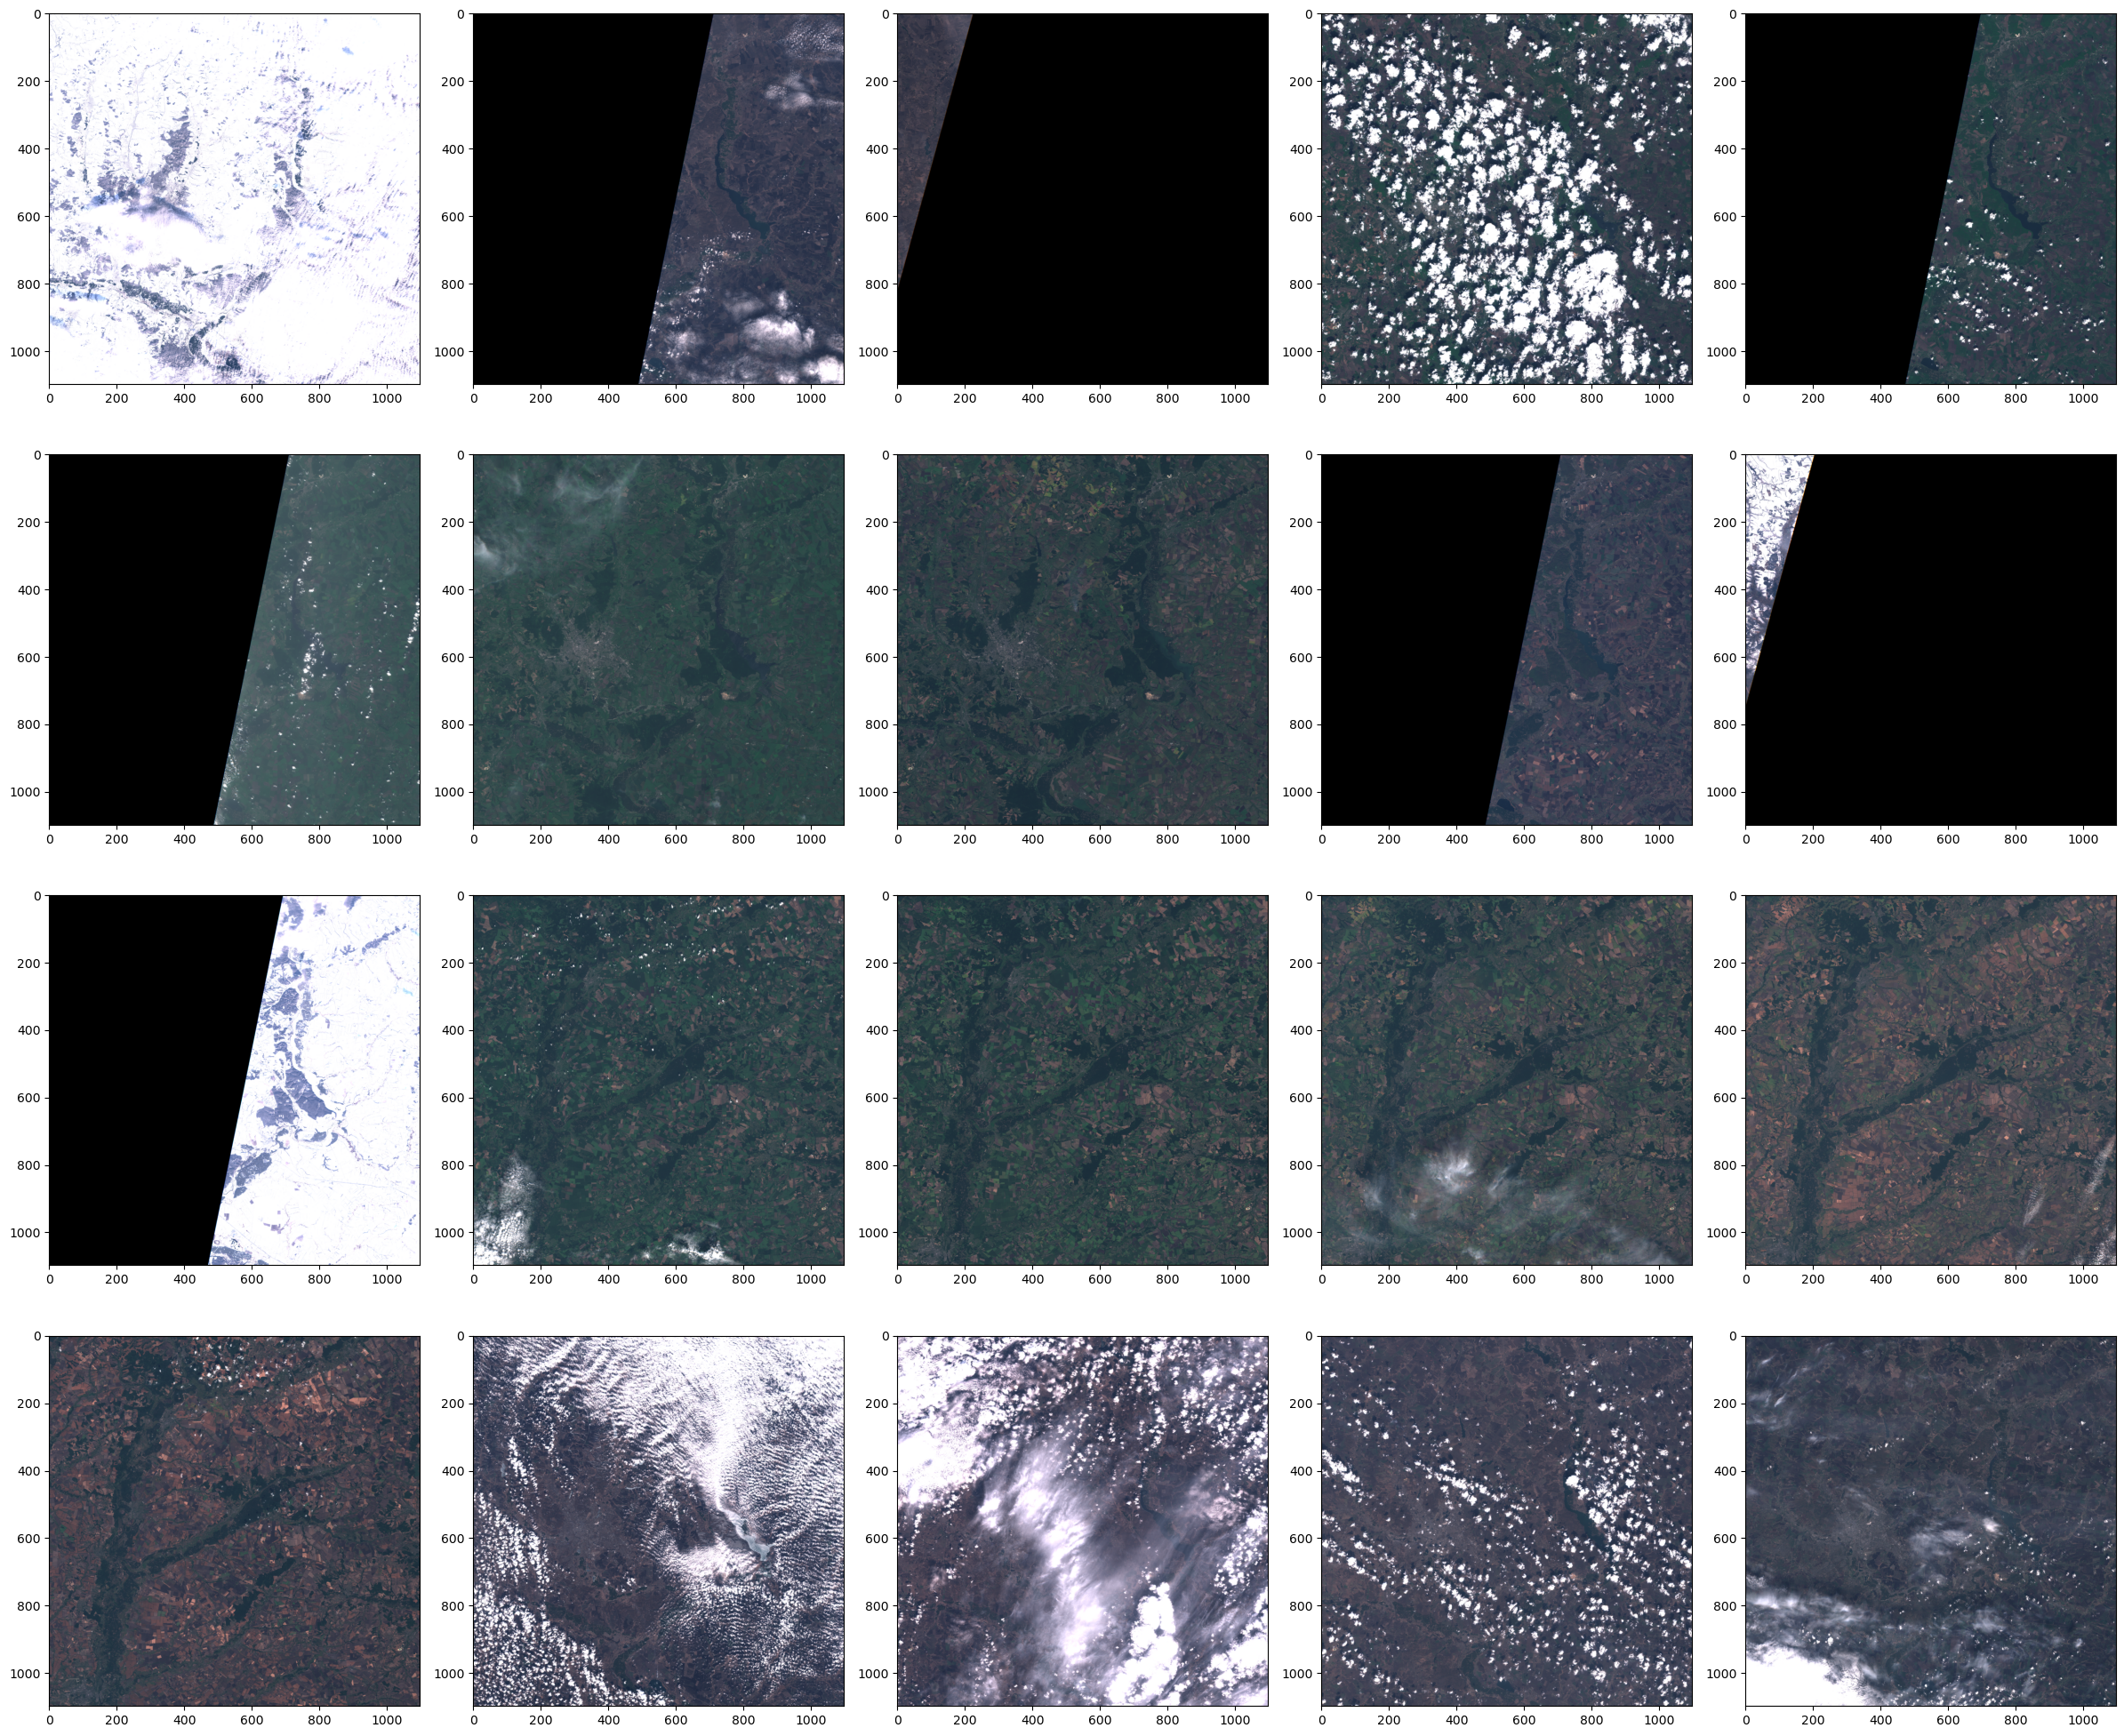

In [11]:
fig, ax = plt.subplots(nrows=4, ncols=5, figsize=(24, 20))
for row in range(4):
    for col in range(5):
        ax[row][col].imshow(scaled_images[row*5 + col])
fig.tight_layout()

## Saving the images

In [15]:
SCALED_IMG_PATH = './data/imgs'
drop_inxs = [1, 2, 4, 5, 8, 9, 10, 33] # indices of images with black areas

new_image_names = [image_names[i].replace('.jp2', '.png') for i in range(len(image_names)) if i not in drop_inxs]
new_scaled_images = [scaled_images[i] for i in range(len(scaled_images)) if i not in drop_inxs]

In [16]:
for name, image in zip(new_image_names, new_scaled_images):
    bgr_image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # convert to BGR as cv2 treats image as BGR by default
    cv2.imwrite(os.path.join(SCALED_IMG_PATH, name), bgr_image)